In [7]:
# Nom du fichier à lire
filename = "Value_tp4.txt"

# Dictionnaire pour stocker les données
data = {}

# Lecture du fichier
with open(filename, "r") as file:
    for line in file:
        # Nettoyage de la ligne
        line = line.strip()
        if not line:  # Ignorer les lignes vides
            continue
        # Identifier les clés et les données
        if line.startswith("listnp"):
            key = "listnp"
        elif line.startswith("listerrorL2"):
            key = "listerrorL2"
        elif line.startswith("listerrorH1"):
            key = "listerrorH1"
        else:
            # Si la ligne contient des données, les convertir en liste de floats
            values = [float(x) for x in line.split()]
            data[key] = values

# Affichage des données importées
print("Données importées :")
for key, values in data.items():
    print(f"{key}: {values}")

# Exemple d'accès aux données
listnp = data.get("listnp", [])
listerrorL2 = data.get("listerrorL2", [])
listerrorH1 = data.get("listerrorH1", [])

Données importées :
listnp: [32.0, 64.0, 128.0, 256.0]
listerrorL2: [0.000146535463, 4.751043672e-05, 1.610928151e-05, 5.31569988e-06]
listerrorH1: [0.007850703265, 0.003792987768, 0.001810519828, 0.000834559841]


Coefficient directeur pour L2 (pente): -1.5915
Coefficient directeur pour H1 (pente): -1.0768


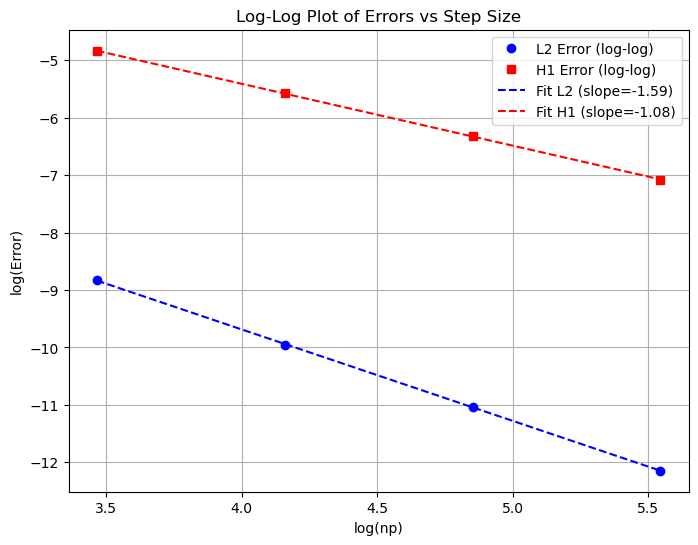

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

log_np = np.log(listnp)
log_L2 = np.log(listerrorL2)
log_H1 = np.log(listerrorH1)

slope_L2, intercept_L2, r_value_L2, p_value_L2, std_err_L2 = linregress(log_np, log_L2)

slope_H1, intercept_H1, r_value_H1, p_value_H1, std_err_H1 = linregress(log_np, log_H1)

print(f"Coefficient directeur pour L2 (pente): {slope_L2:.4f}")
print(f"Coefficient directeur pour H1 (pente): {slope_H1:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(log_np, log_L2, marker='o', linestyle='', color='b', label="L2 Error (log-log)")
plt.plot(log_np, log_H1, marker='s', linestyle='', color='r', label="H1 Error (log-log)")

plt.plot(log_np, slope_L2 * log_np + intercept_L2, 'b--', label=f"Fit L2 (slope={slope_L2:.2f})")
plt.plot(log_np, slope_H1 * log_np + intercept_H1, 'r--', label=f"Fit H1 (slope={slope_H1:.2f})")

plt.xlabel("log(np)")
plt.ylabel("log(Error)")
plt.title("Log-Log Plot of Errors vs Step Size")
plt.legend()
plt.grid(True)
plt.show()

pour le tp3 il y a une dégradation de la convergence